# Lesson3 系列データで分類・予測させてみよう（RNN, LSTM）

## Homework

RNNを用いてさらに高精度なECG5000の分類器を作ってみましょう。

ネットワークの形などは特に制限を設けませんし、今回のLessonで扱った内容以外の工夫も組み込んでもらって構いません。

上位者はリーダーボードに掲載させていただきます。（評価はaccuracyによって行います。）

### 目標値
Accuracy 95%

### ルール
- 訓練データは`x_train`, `y_train`, テストデータは`x_test`で与えられます.
- 予測ラベルは **one_hot表現ではなく0~4のクラスラベル** で表してください.
- 下のセルで指定されているx_train, y_train以外の学習データは使わないでください.

### 評価について

- テストデータ(x_test)に対する予測ラベルをcsvファイルで提出してください.
- ファイル名はsubmission.csvとしてください.
- 予測ラベルのy_testに対する精度 (F値)で評価します.
- 毎日24時にテストデータの一部に対する精度でLeader Boardを更新します.
- 最終的な評価はテストデータ全体に対する精度でおこないます.

### サンプルコード
**次のセルで指定されているx_train, y_trainのみを使って学習させてください.**

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

def load_dataset():
    # 学習データ
    x_train = np.load('/root/userspace/public/lesson3/data/x_train.npy')
    y_train = np.load('/root/userspace/public/lesson3/data/y_train.npy')
    y_train = to_categorical(y_train[:, np.newaxis], num_classes = 5)
    
    # テストデータ
    x_test = np.load('/root/userspace/public/lesson3/data/x_test.npy')

    return (x_train, x_test, y_train)

x_train, x_test, y_train = load_dataset()

Using TensorFlow backend.


In [2]:
x_train[0]

array([[ 0.45045999],
       [-0.16338   ],
       [-0.76466   ],
       [-1.17359996],
       [-1.36800003],
       [-1.91980004],
       [-2.24090004],
       [-2.20099998],
       [-2.00250006],
       [-1.69190001],
       [-1.273     ],
       [-0.99269998],
       [-0.96107   ],
       [-0.72583997],
       [-0.14611   ],
       [ 0.30644   ],
       [ 0.40465999],
       [ 0.31334999],
       [ 0.29808   ],
       [ 0.36894   ],
       [ 0.35854   ],
       [ 0.32422999],
       [ 0.26096001],
       [ 0.29031   ],
       [ 0.38174999],
       [ 0.28941   ],
       [ 0.15983   ],
       [ 0.19647001],
       [ 0.33983001],
       [ 0.35308999],
       [ 0.28421   ],
       [ 0.24625   ],
       [ 0.18831   ],
       [ 0.20656   ],
       [ 0.25044999],
       [ 0.18963   ],
       [ 0.12112   ],
       [ 0.18335   ],
       [ 0.39258999],
       [ 0.53378999],
       [ 0.47286999],
       [ 0.43621001],
       [ 0.39454001],
       [ 0.4267    ],
       [ 0.43961999],
       [ 0

In [3]:
import tensorflow.python.keras
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, GRU
from keras import optimizers
import pandas as pd

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_history(history):
#     print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

### LSTM

Train on 3200 samples, validate on 800 samples
Epoch 1/100
 - 15s - loss: 0.7822 - acc: 0.7928 - val_loss: 0.4274 - val_acc: 0.9000
Epoch 2/100
 - 12s - loss: 0.4291 - acc: 0.8925 - val_loss: 0.3314 - val_acc: 0.9150
Epoch 3/100
 - 12s - loss: 0.4195 - acc: 0.8884 - val_loss: 0.3099 - val_acc: 0.9225
Epoch 4/100
 - 12s - loss: 0.4192 - acc: 0.8850 - val_loss: 0.3178 - val_acc: 0.9113
Epoch 5/100
 - 12s - loss: 0.3498 - acc: 0.9031 - val_loss: 0.2734 - val_acc: 0.9150
Epoch 6/100
 - 12s - loss: 0.3301 - acc: 0.9116 - val_loss: 0.2773 - val_acc: 0.9175
Epoch 7/100
 - 12s - loss: 0.3132 - acc: 0.9138 - val_loss: 0.2600 - val_acc: 0.9163
Epoch 8/100
 - 12s - loss: 0.3209 - acc: 0.9119 - val_loss: 0.2804 - val_acc: 0.9212
Epoch 9/100
 - 12s - loss: 0.3578 - acc: 0.9066 - val_loss: 0.2543 - val_acc: 0.9263
Epoch 10/100
 - 12s - loss: 0.3142 - acc: 0.9162 - val_loss: 0.2617 - val_acc: 0.9263
Epoch 11/100
 - 12s - loss: 0.2911 - acc: 0.9219 - val_loss: 0.2551 - val_acc: 0.9263
Epoch 12/100
 - 

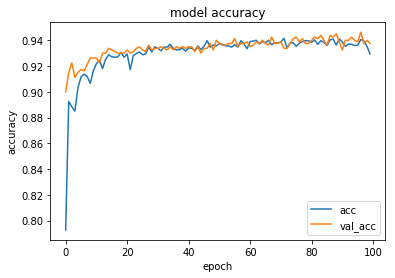

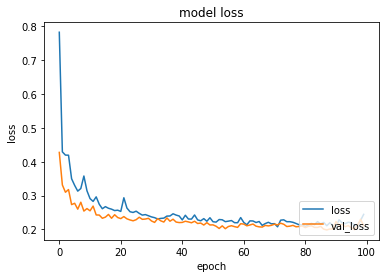

In [5]:
hid_dim = 20
lstm_20 = Sequential()
lstm_20.add(LSTM(hid_dim, input_shape=x_train.shape[1:], dropout=0.20, recurrent_dropout=0.20))
lstm_20.add(Dense(y_train.shape[1], activation='softmax'))
adam = optimizers.adam(lr=0.01, clipnorm=1.)
lstm_20.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])
lstm_20_hist = lstm_20.fit(x_train, y_train, epochs=100, batch_size=100, verbose=2, validation_split=0.2)
lstm_20_pred = np.argmax(lstm_20.predict(x_test), 1)
plot_history(lstm_20_hist)

Train on 3200 samples, validate on 800 samples
Epoch 1/100
 - 11s - loss: 0.7419 - acc: 0.7791 - val_loss: 0.4268 - val_acc: 0.8950
Epoch 2/100
 - 11s - loss: 0.3988 - acc: 0.8969 - val_loss: 0.3194 - val_acc: 0.9088
Epoch 3/100
 - 11s - loss: 0.3492 - acc: 0.9034 - val_loss: 0.2849 - val_acc: 0.9213
Epoch 4/100
 - 11s - loss: 0.3218 - acc: 0.9144 - val_loss: 0.2582 - val_acc: 0.9262
Epoch 5/100
 - 11s - loss: 0.2956 - acc: 0.9213 - val_loss: 0.2496 - val_acc: 0.9275
Epoch 6/100
 - 11s - loss: 0.2864 - acc: 0.9266 - val_loss: 0.2392 - val_acc: 0.9275
Epoch 7/100
 - 11s - loss: 0.2769 - acc: 0.9259 - val_loss: 0.2422 - val_acc: 0.9300
Epoch 8/100
 - 11s - loss: 0.2920 - acc: 0.9219 - val_loss: 0.2419 - val_acc: 0.9263
Epoch 9/100
 - 11s - loss: 0.2732 - acc: 0.9266 - val_loss: 0.2350 - val_acc: 0.9263
Epoch 10/100
 - 11s - loss: 0.2666 - acc: 0.9281 - val_loss: 0.2289 - val_acc: 0.9350
Epoch 11/100
 - 11s - loss: 0.2606 - acc: 0.9297 - val_loss: 0.2335 - val_acc: 0.9300
Epoch 12/100
 - 

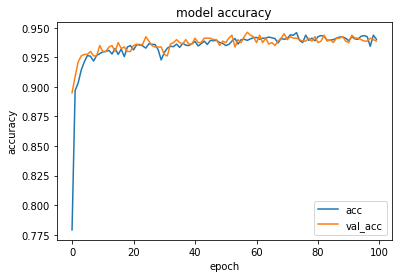

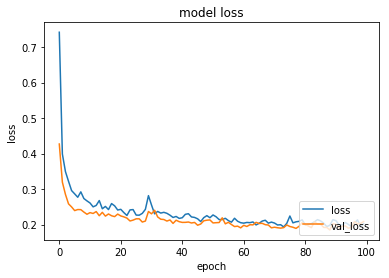

In [6]:
hid_dim = 30
lstm_30 = Sequential()
lstm_30.add(LSTM(hid_dim, input_shape=x_train.shape[1:], dropout=0.20, recurrent_dropout=0.20))
lstm_30.add(Dense(y_train.shape[1], activation='softmax'))
adam = optimizers.adam(lr=0.01, clipnorm=1.)
lstm_30.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])
lstm_30_hist = lstm_30.fit(x_train, y_train, epochs=100, batch_size=100, verbose=2, validation_split=0.2)
lstm_30_pred = np.argmax(lstm_30.predict(x_test), 1)
plot_history(lstm_30_hist)

Train on 3200 samples, validate on 800 samples
Epoch 1/100
 - 11s - loss: 0.6248 - acc: 0.8353 - val_loss: 0.3716 - val_acc: 0.9113
Epoch 2/100
 - 11s - loss: 0.4384 - acc: 0.8828 - val_loss: 0.3904 - val_acc: 0.9013
Epoch 3/100
 - 11s - loss: 0.3781 - acc: 0.8991 - val_loss: 0.2944 - val_acc: 0.9213
Epoch 4/100
 - 11s - loss: 0.3659 - acc: 0.9003 - val_loss: 0.2687 - val_acc: 0.9175
Epoch 5/100
 - 11s - loss: 0.2906 - acc: 0.9238 - val_loss: 0.2431 - val_acc: 0.9250
Epoch 6/100
 - 11s - loss: 0.2731 - acc: 0.9256 - val_loss: 0.2413 - val_acc: 0.9275
Epoch 7/100
 - 11s - loss: 0.2692 - acc: 0.9275 - val_loss: 0.2249 - val_acc: 0.9325
Epoch 8/100
 - 11s - loss: 0.2657 - acc: 0.9275 - val_loss: 0.2370 - val_acc: 0.9338
Epoch 9/100
 - 11s - loss: 0.2518 - acc: 0.9316 - val_loss: 0.2204 - val_acc: 0.9387
Epoch 10/100
 - 11s - loss: 0.2604 - acc: 0.9309 - val_loss: 0.2697 - val_acc: 0.9200
Epoch 11/100
 - 11s - loss: 0.2459 - acc: 0.9334 - val_loss: 0.2220 - val_acc: 0.9313
Epoch 12/100
 - 

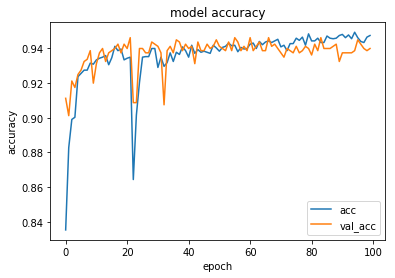

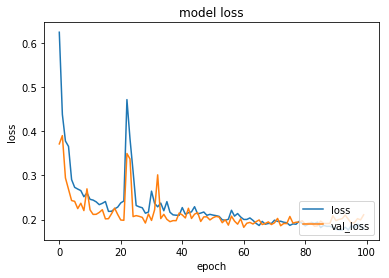

In [7]:
hid_dim = 60
lstm_60 = Sequential()
lstm_60.add(LSTM(hid_dim, input_shape=x_train.shape[1:], dropout=0.20, recurrent_dropout=0.20))
lstm_60.add(Dense(y_train.shape[1], activation='softmax'))
adam = optimizers.adam(lr=0.01, clipnorm=1.)
lstm_60.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])
lstm_60_hist = lstm_60.fit(x_train, y_train, epochs=100, batch_size=100, verbose=2, validation_split=0.2)
lstm_60_pred = np.argmax(lstm_60.predict(x_test), 1)
plot_history(lstm_60_hist)

### GRU

In [8]:
hid_dim = 30
gru_30 = Sequential()
gru_30.add(GRU(hid_dim, input_shape=x_train.shape[1:], dropout=0.20, recurrent_dropout=0.20))
gru_30.add(Dense(y_train.shape[1], activation='softmax'))
adam = optimizers.adam(lr=0.01, clipnorm=1.)
gru_30.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])
gru_30_hist = gru_30.fit(x_train, y_train, epochs=100, batch_size=100, verbose=2, validation_split=0.2)
gru_30_pred = np.argmax(gru_30.predict(x_test), 1)
plot_history(gru_30_hist)

Train on 3200 samples, validate on 800 samples
Epoch 1/100
 - 9s - loss: 0.8349 - acc: 0.7650 - val_loss: 0.4546 - val_acc: 0.8750
Epoch 2/100
 - 9s - loss: 0.4944 - acc: 0.8522 - val_loss: 0.3552 - val_acc: 0.9063
Epoch 3/100
 - 9s - loss: 0.3867 - acc: 0.8925 - val_loss: 0.2899 - val_acc: 0.9188
Epoch 4/100
 - 9s - loss: 0.3465 - acc: 0.9066 - val_loss: 0.2562 - val_acc: 0.9238
Epoch 5/100
 - 9s - loss: 0.3140 - acc: 0.9097 - val_loss: 0.2402 - val_acc: 0.9275
Epoch 6/100
 - 9s - loss: 0.3113 - acc: 0.9078 - val_loss: 0.2351 - val_acc: 0.9313
Epoch 7/100
 - 9s - loss: 0.2925 - acc: 0.9156 - val_loss: 0.2229 - val_acc: 0.9325
Epoch 8/100
 - 9s - loss: 0.2830 - acc: 0.9169 - val_loss: 0.2204 - val_acc: 0.9337
Epoch 9/100
 - 9s - loss: 0.2807 - acc: 0.9141 - val_loss: 0.2254 - val_acc: 0.9312
Epoch 10/100
 - 9s - loss: 0.2822 - acc: 0.9119 - val_loss: 0.2215 - val_acc: 0.9325
Epoch 11/100
 - 9s - loss: 0.2732 - acc: 0.9175 - val_loss: 0.2178 - val_acc: 0.9350
Epoch 12/100
 - 9s - loss: 

KeyboardInterrupt: 

In [ ]:
lstm_hist = lstm_30_hist
while lstm_hist.history['val_loss'][-1] > 0.19:
    hid_dim = 50
    lstm = Sequential()
    lstm.add(LSTM(hid_dim, input_shape=x_train.shape[1:], dropout=0.20, recurrent_dropout=0.20))
    lstm.add(Dense(y_train.shape[1], activation='softmax'))
    adam = optimizers.adam(lr=0.01, clipnorm=1.)
    lstm.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])
    lstm_hist = lstm.fit(x_train, y_train, epochs=1000, batch_size=100, verbose=2, validation_split=0.2)
    lstm_pred = np.argmax(lstm.predict(x_test), 1)
    plot_history(lstm_hist)

### 保存

In [ ]:
submission = pd.Series(lstm_30_pred, name='label')
submission.to_csv('/root/userspace/lesson3/blank/submission_1930.csv', header=True, index_label='id')